<a href="https://colab.research.google.com/github/asairam1/ProgrammingAssignment2/blob/master/Udacity_Project_1_Weather_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 1 - Exploring Weather Trends**



## <u>Importing and Cleaning Data</u>

SQL Import Query: 



---


Since we will be comparing the annual averge temperatures of Bangalore with the average global temperature, we should look at the the years for which both values are available. Hence, we should perform an inner join between the two tables on 'year'. 


> 

```
SELECT A.YEAR,
A.AVG_TEMP AS GLOBAL_TEMP,
B.AVG_TEMP AS BLORE_TEMP
FROM 
(
  SELECT DISTINCT YEAR, AVG_TEMP FROM GLOBAL_DATA
) A 
INNER JOIN
(
  SELECT DISTINCT YEAR, AVG_TEMP FROM CITY_DATA WHERE CITY = 'Bangalore'
) B 
ON A.YEAR = B.YEAR
ORDER BY YEAR;
```





In [ ]:
# Importing relevant libraries
import pandas as pd
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr,spearmanr

#!pip uninstall pandas-profiling
#!pip install pandas-profiling

from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [ ]:
#Importing Data
weather_data = pd.read_csv('/content/drive/My Drive/Udacity Courses/Data Analyst/weather_data.csv')

###Data Profile Checks

In [34]:
profile_report = ProfileReport(weather_data)
display(profile_report.to_widgets())

None

####Observations 

---


> <u>***Missing Data***</u> : We see that the average temperature for Bangalore is missing for 7 records/years in the data. We should explore ways to handle the missing data before calculating moving averages, since they will skew the averages.



> <u>***Distribution (Scatter Plots)***</u> :




*   *Global average annual temperatue across the years*:

We see that there is a linear relationship between year and global average temperature (barring a few outliers), which suggests that the average global temperature has had an increasing trend over the years.   

*   *Bangalore average annual temperature across the years* :

We see a linear relationship between year and local average temperature sugessting an increasing trend similar to the global temperature trends.

* *Global average annual tempaerature vs Bangalore average annual temprature*

There is a clear linear relationship between global annual tmeperature and local annual temperature based on the scatter plot. We can investigate this relationship further by looking into the correlation between the two metrics. 

> <u>***Correlation Grid***</u>

Given the linear relatinship between global and local temperature, based on the correlation grid, we can see a high positive correlation between global temperature and local temperature. This suggests that global temperature trends could possibly be a good indicator of local trends. We can investigate the strength of this linear relationship once we iron out the outliers using moving averages.  








### Handling Missing Data


Options: 
 1.  ***_Drop the rows with missing temperature and consider only overlapping years_***: Since this impacts only ~3% of the records, we can choose to drop these records and go ahead and compare the moving average trends. We have 211 years of overlapping data across the two metrics (1796-2013 minus the 7 dropped years). This allows for sufficient obsbervations for comparison using moving averages while handling null years.
 2.  _Fill the nulls_: Since we do not have sufficient background on how weather trends are aggregated, the decision to fill the nulls will be based on unsubstantiated assumptions, which is not preferable. 
 3.  _Filter data to after 1900_: By doing so, we limit the analysis time period to 1900 - 2013   





In [ ]:
weather_data_clean = weather_data.dropna(inplace=False)

## <u>Implemeting Moving Averages</u>

###Moving Average Calculation

In [ ]:

count = None

output = widgets.Output()
int_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=100,
    step=5,
    description='Step Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
def ins_slider_handler(change):
  output.clear_output()
  weather_data_clean['global_rolling'] = weather_data_clean.global_temp.rolling(change.new).mean() 
  weather_data_clean['blore_rolling'] = weather_data_clean.blore_temp.rolling(change.new).mean()
  global count
  count = change.new
  with output: 
    display(weather_data_clean[['blore_temp','global_temp','blore_rolling','global_rolling']].describe())
int_slider.observe(ins_slider_handler, names = 'value')


display(int_slider)

IntSlider(value=0, continuous_update=False, description='Step Size:', step=5)

#### Picking the moving average step size



> ***Descriptive Statistics***



<u>Bangalore Temperature</u>: Bangalore's temperature ranges from 23.3°C - 26.6°C with a mean tmeperature of 24.9°C. We see that the standard deviation from mean is around ~0.48°C which the suggests that most of the temperature values are clustered close to the mean.

<u>Global Temperature</u>: The global temperature ranges from 6.9°C - 9.7°C with a mean temperature of 8.4°C. We see that the standard deviation of ~0.51°C which similar to the Bangalore trend suggests points clustered close to the mean.  




In [ ]:
display(output)

Output()

In [ ]:
# Line Graph Plotting Function
def line_plot(df,name1,y1,title, num,name2=None,y2=None):
  fig = go.Figure()

  # Add first plot
  fig.add_trace(go.Scatter(x=df['year'], y=df[y1],
                      mode='lines',
                      name=name1))
  if num == 2: 
    # Add second plot
    fig.add_trace(go.Scatter(x=df['year'], y=df[y2],
                        mode='lines',
                        name=name2))

  # Add range slider
  fig.update_layout(
      title = title,
      xaxis=dict(
          rangeselector=dict(
              buttons=list([
                  dict(count=10,
                      label="10y",
                      step="year",
                      stepmode="backward"),
                  dict(count=25,
                      label="25y",
                      step="year",
                      stepmode="backward"),
                  dict(count=50,
                      label="50y",
                      step="year",
                      stepmode="backward"),
                  dict(count=75,
                      label="75y",
                      step="year",
                      stepmode="backward"),
                  dict(count=100,
                      label="100y",
                      step="year",
                      stepmode="backward"),  
                   dict(count=200,
                      label="200y",
                      step="year",
                      stepmode="backward"),                                          
                  dict(step="all",label = "All")
              ])
          ),
          rangeslider=dict(
              visible=True
          ),
          type="date"
      ),
      xaxis_title = 'Year',
      yaxis_title = 'Average Temperature'
  )

  fig.show()
  

In [ ]:

def line_plot1(df,name1,y1,title, num,name2=None,y2=None):
  fig, ax = plt.subplots()

  ax.plot(df['year'],df[y1])
  if num == 2:
    ax.plot(df['year'],df[y2])
    ax.legend([name1,name2])
  ax.set_title(title)
  ax.xaxis.set_label_text('Year')
  ax.yaxis.set_label_text('Average Temperature')
  plt.show()

### Longitudinal Trends of Moving Averages

####Global Trend

* As was noted earlier, we observe a general increasing trend in the average global temperatures with a steep rise starting in the 1980s through 2013.

* Let's explore the latest three 50-year windows to understand the rate of increase in temperature: 
1. Window 1 (1861 - 1911): The average temperature increases by 0.24°C in 50 years, thereby increasing at a rate of **0.48%**. 

2. Window 2 (1912 - 1962): The average temperature increases by 0.48°C units in 50 years, thereby increasing at a rate of **0.97%**.

3. Window 3 (1963 - 2013): The average temperature increases by 0.66°C units in 50 years, thereby increasing at a rate of **1.32%**. 

 

The rate of increase in the latest window, Window 3 is 1.4 times Window 2 and 2.7 times Window 1.  This suggests that the latest window has witnessed the highest rate of increase in temperature in the 150 year timeframe.      
 


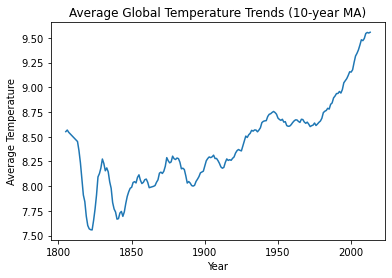

None

In [31]:
display(line_plot1(weather_data_clean,"Global",'global_rolling', 'Average Global Temperature Trends ('+str(count)+'-year MA)',1))

####Local Trend

* As was noted earlier, we observe a general increasing trend in the average local temperature in Bangalore.

* Just like we did with the Global trend, let's explore the latest three 50-year windows to understand the rate of increase in temperature: 
1. Window 1 (1861 - 1911): The average temperature increases by 0.43°C in 50 years, thereby increasing at a rate of **0.86%**. 

2. Window 2 (1912 - 1962): The average temperature increases by 0.2°C in 50 years, thereby increasing at a rate of **0.4%**.

3. Window 3 (1963 - 2013): The average temperature increases by 0.51°C in 50 years, thereby increasing at a rate of **1.02%**. 

 

The rate of increase in the latest window, Window 3 is 2.6 times Window 2 and 1.2 times Window 1.  Like before, this suggests that the latest window has witnessed the highest rate of increase in local temperature in the 150 year timeframe.  

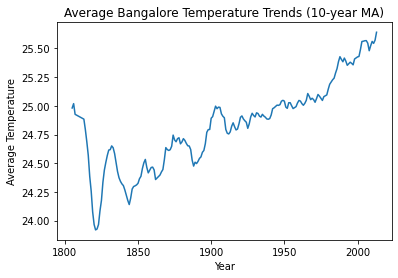

In [ ]:
display(line_plot1(weather_data_clean,"Bangalore",'blore_rolling', 'Average Bangalore Temperature Trends ('+str(count)+'-year MA)',1))

##**Global vs Local Trends**

#### Longitudinal Trend

* We see that the average temperature in Bangalore is around the 25°C mark whereas in globally, it is close to the 9°C mark. Due to this difference in scale, the line graph does not provide a clear comparison of the temperature trends. 

* However, it does confirm what we had noted using the scatter plot, which is that we see a linear relationship between the two metrics. We see simialr increasing trends both locally and globally across the years. 

* We can also imply from the rate of increase observations that for both metrics, the latest 50-year window shows the highest rate of increase in average temperature.



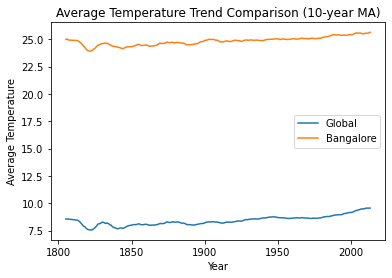

None

In [32]:
display(line_plot1(weather_data_clean,"Global",'global_rolling', 'Average Temperature Trend Comparison ('+str(count)+'-year MA)',2,"Bangalore", 'blore_rolling'))

####Correlation

To better understand the strength of linear relationship between the global and local trends, we must look at the correlation coefficient. 

The below output indicates that the two metrics are highly postively correlated.  

In [33]:

# Correlation between Global and Local average annual temperatures
corr_abs, _ = pearsonr(weather_data_clean['global_temp'],weather_data_clean['blore_temp'])
print("Correlation between Global and Local average annual temperatures: %.2f"%(corr_abs))

# Correlation between Global and Local 25-year moving average temperatures
corr_rolling, _ = pearsonr(weather_data_clean[weather_data_clean['global_rolling'].notna()]['global_rolling'],weather_data_clean[weather_data_clean['blore_rolling'].notna()]['blore_rolling'])
print("\nCorrelation between Global and Local 25-year moving average temperatures: %.2f"%(corr_rolling))


Correlation between Global and Local average annual temperatures: 0.86

Correlation between Global and Local 25-year moving average temperatures: 0.96
